In [1]:
# !mv covid19-cuba.json covid19-cuba.json-old
# !wget http://www.cusobu.nat.cu/covid/data/covid19-cuba.json

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt # Graphics

sns.set_style('darkgrid')

In [3]:
### COLOR

red = '#f44336'
blue = '#2196f3'
yellow = '#ffeb3b'
green = '#4caf50'

#### Carga de datos

In [4]:
import json

In [5]:
data = json.load(open('covid19-cuba.json'))

In [6]:
data['schema-version']

5

#### Diagnosticados

In [7]:
# Cantidad diagnosticados por dia
diagnosticados = []

for k in range(1, len(data['casos']['dias'].keys())+1):
    try: 
        diagnosticados.append(len(data['casos']['dias'][str(k)]['diagnosticados']))
    except: 
        diagnosticados.append(0)

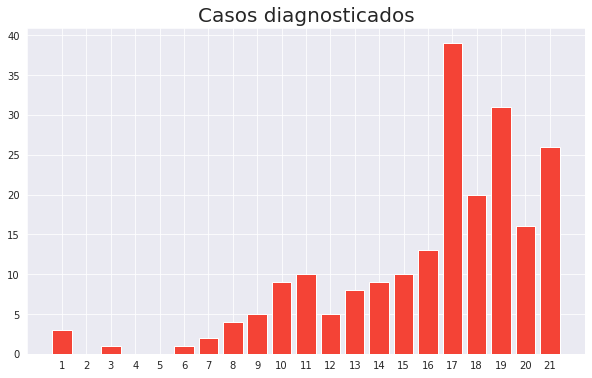

In [8]:
plt.figure(figsize=(10,6))
plt.title('Casos diagnosticados', fontsize=20)
plt.bar([str(k) for k in range(1, len(data['casos']['dias'].keys())+1)], diagnosticados, color=red)
plt.show()

In [9]:
# Total Diagnosticados
sum(diagnosticados)

212

#### Recuperados

In [10]:
# Cantidad recuperados por dia
recuperados = []

for k in range(1, len(data['casos']['dias'].keys())+1):
    try: 
        recuperados.append(data['casos']['dias'][str(k)]['recuperados_numero'])
    except: 
        recuperados.append(0)

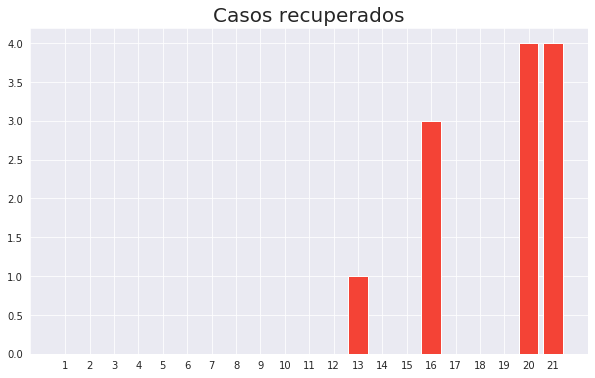

In [11]:
plt.figure(figsize=(10,6))
plt.title('Casos recuperados', fontsize=20)
plt.bar([str(k) for k in range(1, len(data['casos']['dias'].keys())+1)], recuperados, color=red)
plt.show()

In [12]:
# Total recuperados

sum(recuperados)

12

#### Evacuados

In [13]:
# Cantidad evacuados por dia
evacuados = []

for k in range(1, len(data['casos']['dias'].keys())+1):
    try: 
        evacuados.append(data['casos']['dias'][str(k)]['evacuados_numero'])
    except: 
        evacuados.append(0)

In [14]:
# Total evacuados
sum(evacuados)

1

#### Muertes

In [15]:
muertes = []

for k in range(1, len(data['casos']['dias'].keys())+1):
    try: 
        muertes.append(data['casos']['dias'][str(k)]['muertes_numero'])
    except: 
        muertes.append(0)

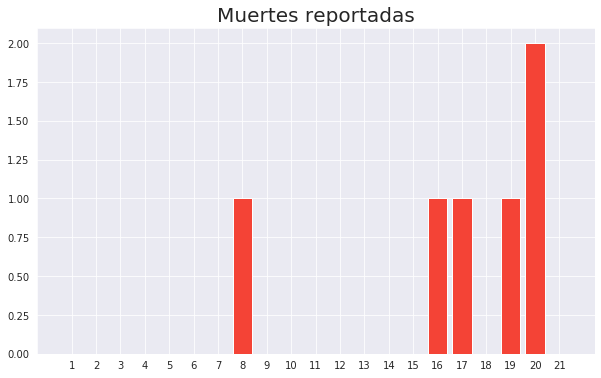

In [16]:
plt.figure(figsize=(10,6))
plt.title('Muertes reportadas', fontsize=20)
plt.bar([str(k) for k in range(1, len(data['casos']['dias'].keys())+1)], muertes, color=red)
plt.show()

In [17]:
# Total Muertes
sum(muertes)

6

#### Activos

In [18]:
activos = sum(diagnosticados) - (sum(recuperados) + sum(evacuados) + sum(muertes))
activos

193

#### Fecha

In [19]:
last_day = [k for k in data['casos']['dias'].keys()][-1]

In [20]:
data['casos']['dias'][last_day]['fecha']

'2020/03/31'

In [21]:
total = sum(diagnosticados) + sum(recuperados) + sum(muertes) + sum(evacuados)

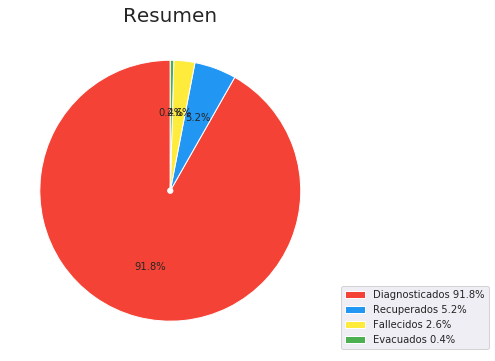

In [22]:
plt.figure(figsize=(10,6))
plt.title('Resumen', fontsize=20)
wedges, _, _  = plt.pie([sum(diagnosticados), sum(recuperados), sum(muertes), sum(evacuados)], 
                        autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.98), colors=[red, blue, yellow, green])
plt.legend(wedges, [
    'Diagnosticados ' + str(round(sum(diagnosticados)/total*100, 1)) + '%', 
    'Recuperados ' + str(round(sum(recuperados)/total*100, 1)) + '%', 
    'Fallecidos ' + str(round(sum(muertes)/total*100, 1)) + '%', 
    'Evacuados ' + str(round(sum(evacuados)/total*100, 1)) + '%'
], loc='lower center', bbox_to_anchor=(1,0,0.5,1))

plt.show()

In [23]:
last_day = [k for k in data['casos']['dias'].keys()][-1]
ingresados = data['casos']['dias'][last_day]['sujetos_riesgo']
ingresados

2742

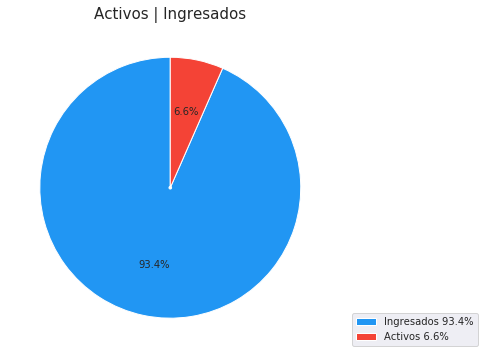

In [24]:
plt.figure(figsize=(10,6))
plt.title('Activos | Ingresados', fontsize=15)
wedges, _, _  = plt.pie([ingresados, activos], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.99), colors=[blue, red])
plt.legend(wedges, [
    'Ingresados ' + str(round(ingresados/(ingresados+activos)*100, 1)) + '%',
    'Activos ' + str(round(activos/(ingresados+activos)*100, 1)) + '%',
], loc='lower center', bbox_to_anchor=(1,0,0.5,1))
plt.show()

#### Casos por sexo

In [25]:
labels = 'Mujeres', 'Hombres', 'No reportado'
hombres = 0
mujeres = 0
no_reportado = 0

In [26]:
for k in range(1, len(data['casos']['dias'].keys())+1):
    try:
        for caso in data['casos']['dias'][str(k)]['diagnosticados']:
            if caso['sexo'] == 'hombre':
                hombres += 1
            elif caso['sexo'] == 'mujer':
                mujeres += 1
            else:
                no_reportado += 1
    except:
        pass

In [27]:
hombres

114

In [28]:
mujeres

97

In [29]:
hombres + mujeres

211

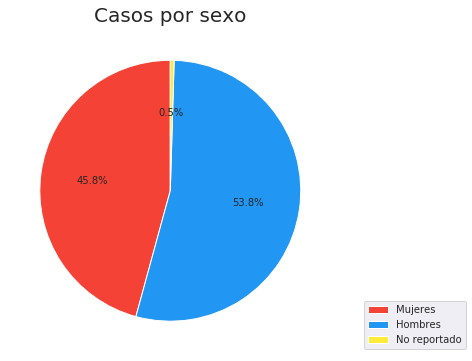

In [30]:
plt.figure(figsize=(10,6))
plt.title('Casos por sexo', fontsize=20)
wedges, _, _  = plt.pie([mujeres, hombres, no_reportado], autopct='%1.1f%%', startangle=90, colors=[red, blue, yellow])
plt.legend(wedges, labels, loc='lower center', bbox_to_anchor=(1,0,0.5,1))
plt.show()

#### Casos por modo de contagio

In [31]:
from collections import defaultdict

In [32]:
modos = defaultdict(int)

for k in range(1, len(data['casos']['dias'].keys())+1):
    try:
        for caso in data['casos']['dias'][str(k)]['diagnosticados']:
            modos[caso['contagio']] += 1
    except:
        pass

In [33]:
labels = [str(k) for k in modos.keys()]

In [34]:
values = [v for v in modos.values()]

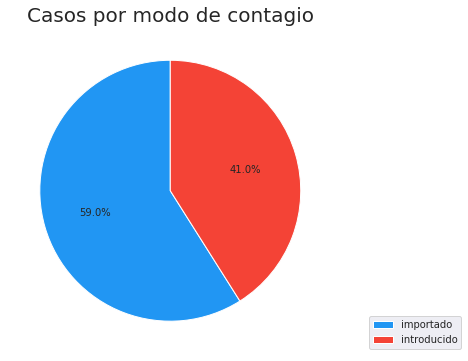

In [35]:
plt.figure(figsize=(10,6))
plt.title('Casos por modo de contagio', fontsize=20)
wedges, _, _  = plt.pie(values, autopct='%1.1f%%', startangle=90, colors=[blue, red, yellow, green])
plt.legend(wedges, labels, loc='lower center', bbox_to_anchor=(1,0,0.5,1))
plt.show()

#### Distribución por nacionalidad de casos extranjeros

In [36]:
paises = defaultdict(int)


for k in range(1, len(data['casos']['dias'].keys())+1):
    try:
        for caso in data['casos']['dias'][str(k)]['diagnosticados']:
            if caso['pais'] != 'cu':
                paises[caso['pais']] += 1
    except:
        pass

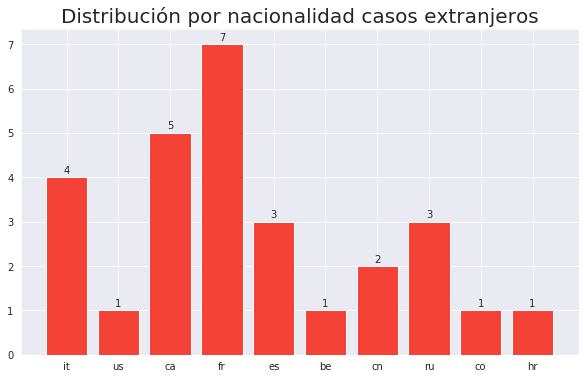

In [56]:
plt.figure(figsize=(10,6))
plt.title('Distribución por nacionalidad casos extranjeros', fontsize=20)
plt.bar([str(k) for k in paises.keys()], [v for v in paises.values()], color=red)

for x,y in enumerate(paises.values()):
    label = "{}".format(y)
    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,4),
                 ha='center')
    
plt.show()

#### Casos por nacionalidad

In [38]:
labels = 'Cubanos', 'Extranjeros'
cubanos = 0
extranjeros = 0

In [39]:
for k in range(1, len(data['casos']['dias'].keys())+1):
    try:
        for caso in data['casos']['dias'][str(k)]['diagnosticados']:
            if caso['pais'] == 'cu':
                cubanos += 1
            else:
                extranjeros += 1
    except:
        pass

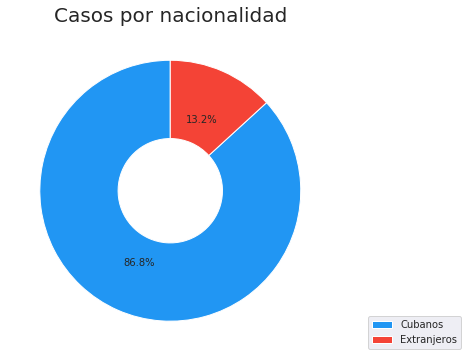

In [57]:
plt.figure(figsize=(10,6))
plt.title('Casos por nacionalidad', fontsize=20)
wedges, _, _  = plt.pie([cubanos, extranjeros], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.6), colors=[blue, red])
plt.legend(wedges, labels, loc='lower center', bbox_to_anchor=(1,0,0.5,1))
plt.show()

#### Distribución por rangos etarios

In [41]:
edades = {'0-18': 0, '19-40': 0, '41-60': 0, '+60': 0}

for k in range(1, len(data['casos']['dias'].keys())+1):
    try:
        for caso in data['casos']['dias'][str(k)]['diagnosticados']:
            edad = caso['edad']
            
            if edad <= 18 :
                edades['0-18'] += 1
            elif edad >= 19 and edad <= 40:
                edades['19-40'] += 1
            elif edad >= 41 and edad <= 60:
                edades['41-60'] += 1
            else:
                edades['+60'] += 1
    except:
        pass

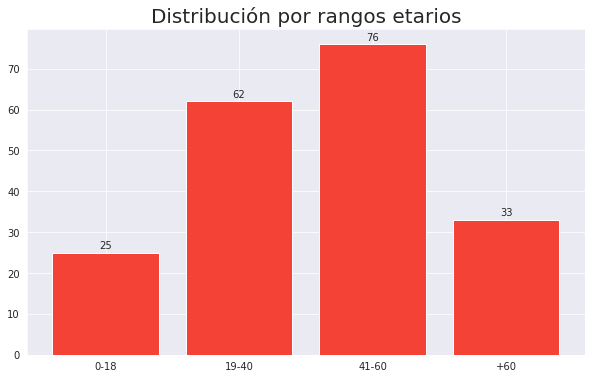

In [58]:
plt.figure(figsize=(10,6))
plt.title('Distribución por rangos etarios', fontsize=20)
plt.bar([str(k) for k in edades.keys()], [v for v in edades.values()], color=red)

for x,y in enumerate(edades.values()):
    label = "{}".format(y)
    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,4),
                 ha='center')

plt.show()

#### Test acumulados por días

In [43]:
cant_tests = []

for k in range(12, len(data['casos']['dias'].keys())+1):
    cant_tests.append(data['casos']['dias'][str(k)]['tests_total'])

In [44]:
prop_test_vs_detected = []
detected_acc = []

for i, c in enumerate(cant_tests):
    detected_acc.append(sum(diagnosticados[:11+i]))
    prop_test_vs_detected.append(round(detected_acc[-1] / c, 2)*100)

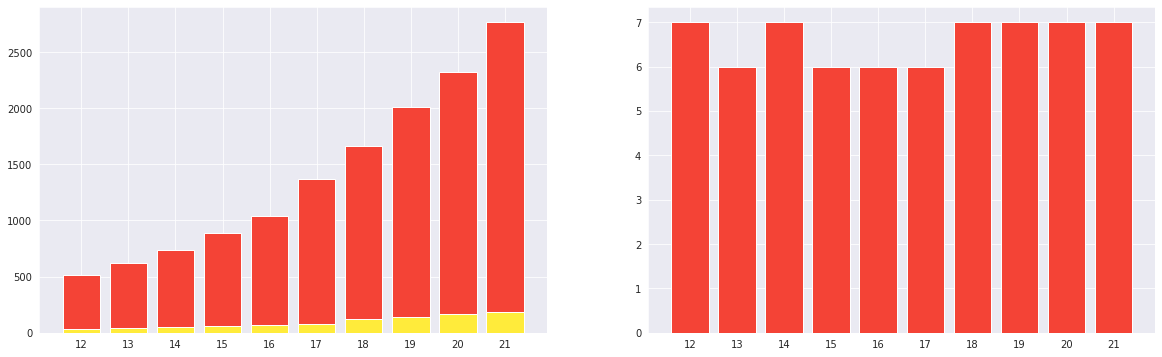

In [61]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))

# Test realizados
ax1.bar([str(k) for k in range(12, len(data['casos']['dias'].keys())+1)], cant_tests, color=red)
ax1.bar([str(k) for k in range(12, len(data['casos']['dias'].keys())+1)], detected_acc, color=yellow)

# Proporción entre casos confirmados y test realizados
ax2.bar([str(k) for k in range(12, len(data['casos']['dias'].keys())+1)], prop_test_vs_detected, color=red) 

plt.show()

#### Evolución de casos por días

In [46]:
diagnosticados_acc = []

for i, _ in enumerate(diagnosticados):
    diagnosticados_acc.append(sum(diagnosticados[:i+1]))

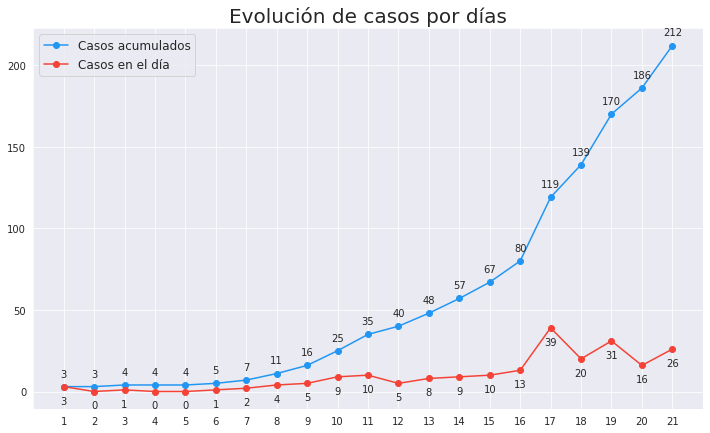

In [62]:
plt.figure(figsize=(12, 7))

xss = [str(i) for i in range(1,len(diagnosticados)+1)]
xs = [i for i in range(0,len(diagnosticados))]

plt.plot(xss, diagnosticados_acc, 'o-', label='Casos acumulados', color=blue)
plt.plot(xss, diagnosticados, 'o-', label='Casos en el día', color=red)

for x,y in zip(xs,diagnosticados_acc):
    label = "{}".format(y)
    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')
    
for x,y in zip(xs,diagnosticados):
    label = "{}".format(y)
    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,-17),
                 ha='center')

plt.title('Evolución de casos por días', fontsize=20)
plt.legend(frameon=True, fontsize=12)
plt.show()

In [48]:
muertes_acc = []

for i, _ in enumerate(muertes):
    muertes_acc.append(sum(muertes[:i+1]))

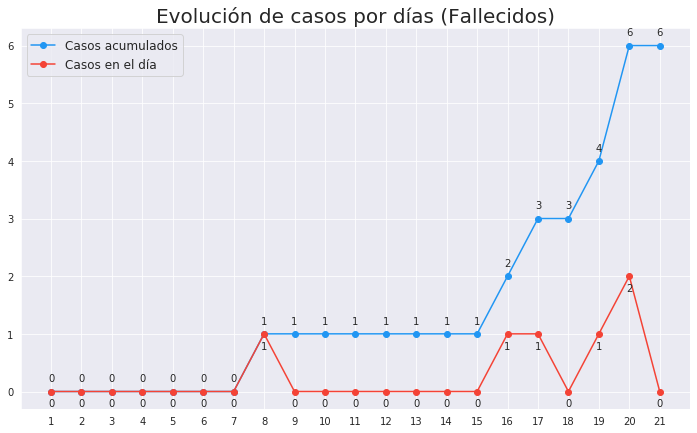

In [63]:
plt.figure(figsize=(12, 7))

plt.plot(xss, muertes_acc, 'o-', label='Casos acumulados', color=blue)
plt.plot(xss, muertes, 'o-', label='Casos en el día', color=red)

for x,y in zip(xs,muertes_acc):
    label = "{}".format(y)
    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')

for x,y in zip(xs,muertes):
    label = "{}".format(y)
    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,-15),
                 ha='center')

plt.title('Evolución de casos por días (Fallecidos)', fontsize=20)
plt.legend(frameon=True, fontsize=12)
plt.show()

#### Casos detectados por provincias

In [50]:
locations = defaultdict(int)

for k in range(1, len(data['casos']['dias'].keys())+1):
    try:
        for caso in data['casos']['dias'][str(k)]['diagnosticados']:
            locations[caso['provincia_detección']] += 1
    except:
        pass
    
locations = sorted(dict(locations).items(), key=lambda kv: kv[1])

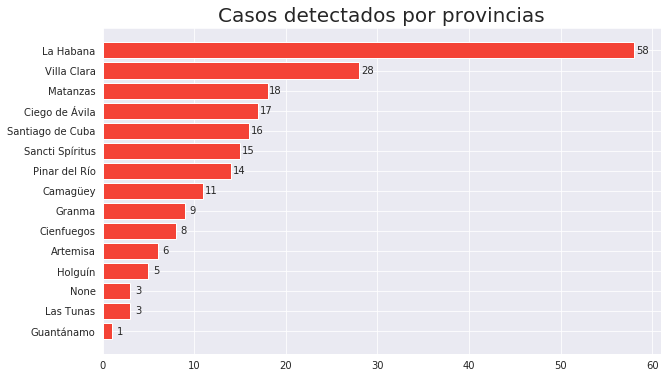

In [64]:
# Casos detectados por provincias
plt.figure(figsize=(10, 6))
plt.barh([str(l[0]) for l in locations], [l[1] for l in locations], color=red)

for i, v in enumerate(locations):
    label = "{}".format(v[1])
    plt.annotate(label,
                 (v[1],i),
                 textcoords="offset points",
                 xytext=(8,-3),
                 ha='center')

plt.title('Casos detectados por provincias',fontsize = 20)
plt.show()

In [52]:
mlocations = defaultdict(int)

for k in range(1, len(data['casos']['dias'].keys())+1):
    try:
        for caso in data['casos']['dias'][str(k)]['diagnosticados']:
            mun = caso['municipio_detección']
            prov = caso['provincia_detección']
            
            mkey = mun + '\n' + '('+prov+')'
            
            mlocations[mkey] += 1
    except:
        pass
    
mlocations = sorted(dict(mlocations).items(), key=lambda kv: kv[1])

municipios_top10 = mlocations[-10:]

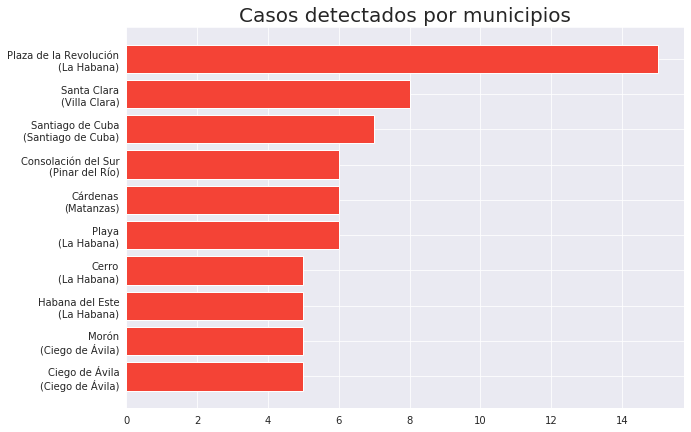

In [65]:
# Casos detectados por provincias
plt.figure(figsize=(10, 7))
plt.barh([str(l[0]) for l in municipios_top10], [l[1] for l in municipios_top10], color=red)
plt.title('Casos detectados por municipios',fontsize = 20)
plt.show()

In [54]:
cprovinces = defaultdict(list)

for k in data['casos']['dias'].keys():
    try:
        for caso in data['casos']['dias'][k]['diagnosticados']:
            p = caso['provincia_detección']
            cprovinces[p].append(caso)
    except:
        pass

In [55]:
len(cprovinces['Santiago de Cuba'][15])

18